We will transform the data and check for any missing values. Then, we will remove the missing values if necessary and encode the categorical variables with numerical values.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('athletes.csv')

In [ ]:
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [ ]:
data[data['weight'].isna()].head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
12,258556239,Abbas Qali,IOA,male,10/11/92,NaN,NaN,aquatics,0,0,0
28,349871091,Abdelhafid Benchabla,ALG,male,9/26/86,1.86,NaN,boxing,0,0,0
30,23564778,Abdelkader Chadi,ALG,male,12/12/86,1.78,NaN,boxing,0,0,0
37,934545704,Abdelrahman Salah Orabi Abdelgawwad,EGY,male,10/9/87,1.85,NaN,boxing,0,0,0
47,469953606,Abdoullah Bamoussa,ITA,male,6/8/86,NaN,NaN,athletics,0,0,0


In [ ]:
data = data[~(data['weight'].isna())]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10879 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10879 non-null  int64  
 1   name         10879 non-null  object 
 2   nationality  10879 non-null  object 
 3   sex          10879 non-null  object 
 4   dob          10879 non-null  object 
 5   height       10858 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        10879 non-null  object 
 8   gold         10879 non-null  int64  
 9   silver       10879 non-null  int64  
 10  bronze       10879 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1019.9+ KB


In [ ]:
data = data[~(data['height'].isna())]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10858 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10858 non-null  int64  
 1   name         10858 non-null  object 
 2   nationality  10858 non-null  object 
 3   sex          10858 non-null  object 
 4   dob          10858 non-null  object 
 5   height       10858 non-null  float64
 6   weight       10858 non-null  float64
 7   sport        10858 non-null  object 
 8   gold         10858 non-null  int64  
 9   silver       10858 non-null  int64  
 10  bronze       10858 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1017.9+ KB


In [ ]:
selectedColumns = data[['weight', 'height', 'sport', 'gold', 'silver', 'bronze']]

In [ ]:
X = pd.get_dummies(selectedColumns, columns=['sport'])

In [ ]:
X.head()

,weight,height,gold,silver,bronze,sport_aquatics,sport_archery,sport_athletics,sport_badminton,sport_basketball,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,64.0,1.72,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,56.0,1.68,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,79.0,1.98,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,80.0,1.83,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,71.0,1.81,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
le.fit(data['sex'])

LabelEncoder()

In [ ]:
y = pd.Series(data=le.transform(data['sex']))

In [ ]:
y.head()

0    1
1    0
2    1
3    1
4    1
dtype: int64

We will split the dataset into training (80% of the data) and testing (20% of the data) subsets and train the logistic regression model.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

We will plot the ROC curve using sklearn.metrics. roc_curve.

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
predictions = model.predict_proba(X_test)

In [ ]:
fpr, tpr, thres = roc_curve(y_test, predictions[:, 1])

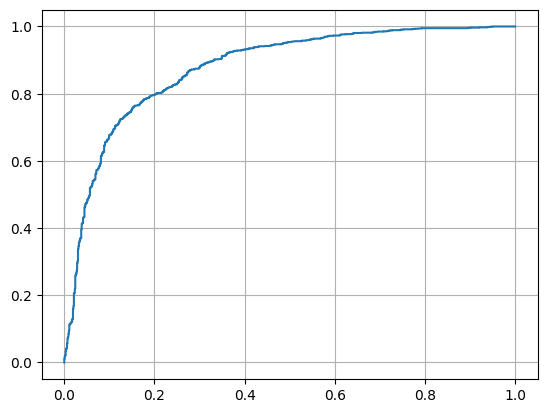

In [ ]:
plt.plot(fpr, tpr)
plt.grid()

We will calculate the ROC-AUC metric using the sklearn.metrics.roc_auc_score function.

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y_test, predictions[:, 1])

0.8773139593769674

We will manually implement the calculation of the TPR and FPR metrics without using built-in functions from the sklearn library.

In [ ]:
thresholds = np.linspace(0, 1, 100)
fpr_h = []
tpr_h = []

for threshold in thresholds:
    tp = 0
    fp = 0
    fn = 0
    tn = 0
    for predicted_prob, actual in zip(predictions[:, 1], y_test):
        predicted = 1 if predicted_prob >= threshold else 0
        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1
        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
    tpr = tp/(tp + fn)
    fpr = fp/(fp + tn)

    fpr_h.append(fpr)
    tpr_h.append(tpr)

We will plot the ROC curve using the metrics calculated in the previous step and combine the two plots into one.

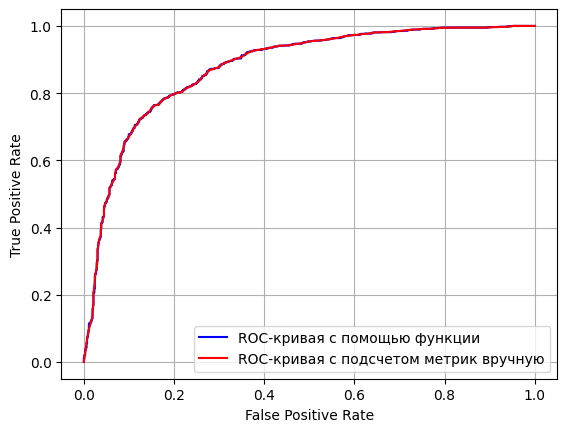

In [ ]:
plt.plot(fpr, tpr, color='blue', label='ROC-кривая с помощью функции')
plt.plot(fpr_h, tpr_h, color='red', label='ROC-кривая с подсчетом метрик вручную')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc=0)
plt.grid()

As we can see, the two curves are very close but do not completely overlap.

We will plot the Precision-Recall curve using the metrics calculated earlier

In [ ]:
thresholds = np.linspace(0, 1, 100)
precision_h = []
recall_h = []
for threshold in thresholds:
    tp = 0
    fp = 0
    fn = 0
    tn = 0
    for predicted_prob, actual in zip(predictions[:, 1], y_test):
        predicted = 1 if predicted_prob >= threshold else 0
        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1
        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
    tpr = tp/(tp + fn)
    fpr = fp/(fp + tn)
    try:
        precision = tp/(tp + fp)
    except:
        precision = 0
    recall = tpr

    precision_h.append(precision)
    recall_h.append(recall)

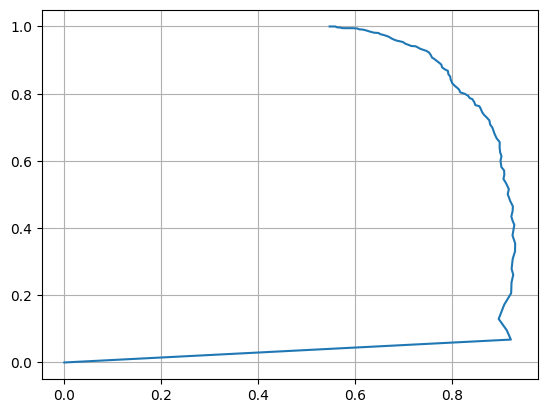

In [ ]:
plt.plot(precision_h, recall_h)
plt.grid()

The area under the ROC curve (AUC) is quite large, which means that the model can almost always distinguish between positive and negative cases. TPR and FPR are positively correlated. In the Precision-Recall curve, we observe that a decrease in one metric is accompanied by an increase in the other up to a certain point, after which it also significantly decreases.